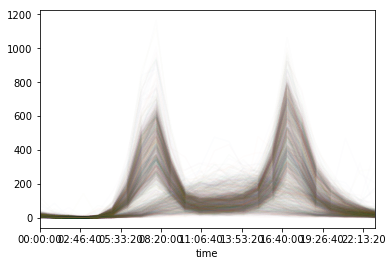

In [1]:
%matplotlib inline
from jupyterworkflow.data import get_fremont_data
data = get_fremont_data()
pivoted = data.pivot_table("Total", index=data.index.time, columns=data.index.date)
pivoted.plot(legend=False, alpha=0.01)

In [2]:
pivoted.index

Index([00:00:00, 01:00:00, 02:00:00, 03:00:00, 04:00:00, 05:00:00, 06:00:00,
       07:00:00, 08:00:00, 09:00:00, 10:00:00, 11:00:00, 12:00:00, 13:00:00,
       14:00:00, 15:00:00, 16:00:00, 17:00:00, 18:00:00, 19:00:00, 20:00:00,
       21:00:00, 22:00:00, 23:00:00],
      dtype='object')

In [3]:
data.index

DatetimeIndex(['2012-10-03 00:00:00', '2012-10-03 01:00:00',
               '2012-10-03 02:00:00', '2012-10-03 03:00:00',
               '2012-10-03 04:00:00', '2012-10-03 05:00:00',
               '2012-10-03 06:00:00', '2012-10-03 07:00:00',
               '2012-10-03 08:00:00', '2012-10-03 09:00:00',
               ...
               '2017-07-31 14:00:00', '2017-07-31 15:00:00',
               '2017-07-31 16:00:00', '2017-07-31 17:00:00',
               '2017-07-31 18:00:00', '2017-07-31 19:00:00',
               '2017-07-31 20:00:00', '2017-07-31 21:00:00',
               '2017-07-31 22:00:00', '2017-07-31 23:00:00'],
              dtype='datetime64[ns]', name='Date', length=42312, freq=None)

Strange!!! Has only 12 hour not  24.

In [4]:
import numpy as np
np.unique(data.index.time)

array([datetime.time(0, 0), datetime.time(1, 0), datetime.time(2, 0),
       datetime.time(3, 0), datetime.time(4, 0), datetime.time(5, 0),
       datetime.time(6, 0), datetime.time(7, 0), datetime.time(8, 0),
       datetime.time(9, 0), datetime.time(10, 0), datetime.time(11, 0),
       datetime.time(12, 0), datetime.time(13, 0), datetime.time(14, 0),
       datetime.time(15, 0), datetime.time(16, 0), datetime.time(17, 0),
       datetime.time(18, 0), datetime.time(19, 0), datetime.time(20, 0),
       datetime.time(21, 0), datetime.time(22, 0), datetime.time(23, 0)], dtype=object)

There's a time issue with the formatting. 

In [5]:
!head -24 Fremont.csv

Date,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
10/03/2012 12:00:00 AM,4,9
10/03/2012 01:00:00 AM,4,6
10/03/2012 02:00:00 AM,1,1
10/03/2012 03:00:00 AM,2,3
10/03/2012 04:00:00 AM,6,1
10/03/2012 05:00:00 AM,21,10
10/03/2012 06:00:00 AM,105,50
10/03/2012 07:00:00 AM,257,95
10/03/2012 08:00:00 AM,291,146
10/03/2012 09:00:00 AM,172,104
10/03/2012 10:00:00 AM,72,46
10/03/2012 11:00:00 AM,10,32
10/03/2012 12:00:00 PM,35,41
10/03/2012 01:00:00 PM,42,48
10/03/2012 02:00:00 PM,77,51
10/03/2012 03:00:00 PM,72,92
10/03/2012 04:00:00 PM,133,182
10/03/2012 05:00:00 PM,192,391
10/03/2012 06:00:00 PM,122,258
10/03/2012 07:00:00 PM,59,69
10/03/2012 08:00:00 PM,29,51
10/03/2012 09:00:00 PM,25,38
10/03/2012 10:00:00 PM,24,25


In [21]:
x = pivoted.fillna(0).T.values
x.shape

(1763, 24)

In [22]:
from sklearn.decomposition import PCA
x2 = PCA(2, svd_solver="full").fit_transform(x)

In [24]:
x2.shape

(1763, 2)

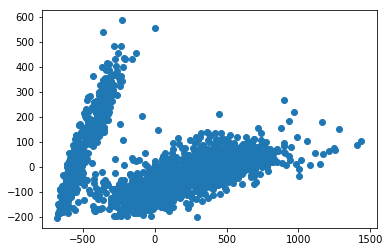

In [28]:
import matplotlib.pyplot as plt
plt.scatter(x2[:, 0], x2[:, 1])

In [29]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(2)
gmm.fit(x)
labels = gmm.predict(x)
labels

array([1, 1, 1, ..., 0, 0, 1])

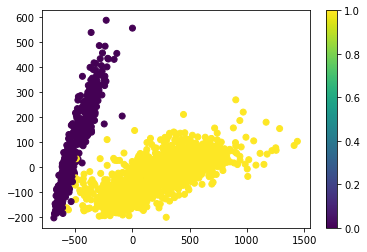

In [32]:
plt.scatter(x2[:, 0], x2[:, 1], c=labels)
plt.colorbar()

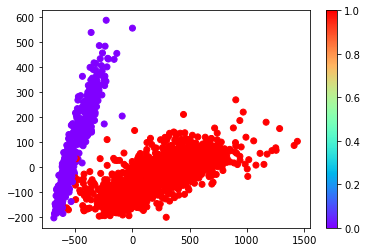

In [33]:
plt.scatter(x2[:, 0], x2[:, 1], c=labels, cmap="rainbow")
plt.colorbar()

Let's examine what's going on inside these clusters. 

In [46]:
pivoted.T(labels == 0).T.plot(legend=False, alpha=0.01)

TypeError: 'DataFrame' object is not callable